In [1]:
import warnings
warnings.filterwarnings(action='ignore') #경고 메시지 무시

In [19]:
import pandas as pd
import geopandas as gpd
import fiona

# CCTV 데이터

In [25]:
# CCTV CSV 로딩
df_cctv = pd.read_csv('../dataset/전국CCTV표준데이터.csv', index_col=None, header=0, 
                 names=['admin', 'addr1', 'addr2', 'usetype', 'cnt', 'pixel', 'azimuth', 'keep', 'inst_date', 'tel', 'lat', 'lon', 'up_date', 'offer_cd', 'offer'], 
                 usecols=['admin', 'addr1', 'lat', 'lon'], 
                 dtype={'admin':object, 'addr1':object, 'lat':float, 'lon':float},
                 encoding="EUC-KR")
df_cctv.head()

,admin,addr1,lat,lon
0,경상남도 김해시청,NaN,35.249247,128.871639
1,경상남도 김해시청,NaN,35.247411,128.873605
2,경상남도 김해시청,NaN,35.261728,128.874144
3,경상남도 김해시청,NaN,35.247076,128.872461
4,경상남도 김해시청,NaN,35.241185,128.877334


In [28]:
# CCTV CSV 에서 서울시 데이터만 추출
df_cctv[['lat', 'lon']].dropna() #좌표값 없는 데이터 제거
df_cctv2 = df_cctv[df_cctv['addr1'].str.contains('서울특별시')==True] 

In [30]:
# 서울시 CCTV 공간데이터화
geom_cctv = gpd.points_from_xy(df_cctv2.lon, df_cctv2.lat)
geom_cctv[0:3]

<GeometryArray>
Length: 3, dtype: geometry

In [31]:
# 좌표계 정의/변환용 라이브러리
import pyproj
from fiona.crs import from_epsg
coulumns = ['admin', 'addr1']
gdf_cctv = gpd.GeoDataFrame(df_cctv2[coulumns], geometry=geom_cctv, crs=from_epsg(4326))
#df_cctv_gdf.info()
gdf_cctv.head()

,admin,addr1,geometry
56,서울특별시 성북구청,서울특별시 성북구 돌곶이로34길 20-19,POINT (127.05113 37.61606)
57,서울특별시 성북구청,서울특별시 성북구 장위로33길 45,POINT (127.05119 37.61485)
58,서울특별시 성북구청,서울특별시 성북구 장월로5길 40,POINT (127.04720 37.60996)
59,서울특별시 성북구청,서울특별시 성북구 한천로86길 18,POINT (127.05986 37.61469)
60,서울특별시 성북구청,서울특별시 성북구 보국문로29길 51,POINT (127.00161 37.61565)


<AxesSubplot:>

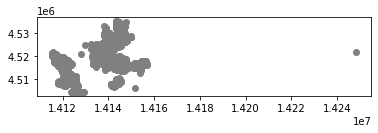

In [32]:
gdf_cctv2 = gdf_cctv.to_crs(epsg=3857)  #좌표계를 epsg 3857로 변환
gdf_cctv2.plot(color='gray')

In [33]:
#강남구 CCTV만 한번 더 추출
gdf_cctv3 = gdf_cctv2[gdf_cctv2['admin'].isin(['서울특별시 강남구청'])]

<AxesSubplot:>

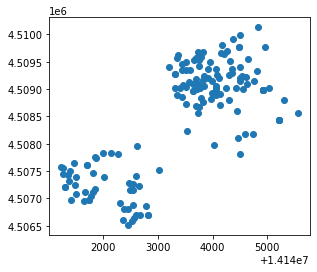

In [34]:
gdf_cctv3.plot()

In [36]:
#CCTV 공간데이터를 geojson으로 저장
gdf_cctv2.to_file('../dataset/cctv.geojson', driver='GeoJSON')
gdf_cctv3.to_file('../dataset/cctv_gn.geojson', driver='GeoJSON')

# 도서관 데이터

In [39]:
#도서관 csv 로딩
df_library = pd.read_csv('../dataset/전국도서관표준데이터.csv', index_col=None, header=0, 
                 names=['name', 'do', 'gu', 'type', 'offday', 'time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'seat', 'datacnt1', 'datacnt2', 'datacnt3', 'rent1', 'rentdat', 'addr', 'admin', 'tel', 'land_area', 'bd_area', 'url', 'lat', 'lon', 'update', 'offer_cd', 'offer'], 
                 usecols=['name', 'do', 'gu', 'lat', 'lon'], 
                 dtype={'name':object, 'do':object, 'gu':object, 'lat':float, 'lon':float},
                 encoding="EUC-KR"    )
df_library.head()

,name,do,gu,lat,lon
0,중랑구립면목정보도서관,서울특별시,중랑구,37.587356,127.087557
1,중랑숲어린이도서관,서울특별시,중랑구,37.602634,127.103926
2,중화어린이도서관,서울특별시,중랑구,37.595004,127.074892
3,양원숲속도서관,서울특별시,중랑구,37.606825,127.110697
4,중랑상봉도서관,서울특별시,중랑구,37.593127,127.080932


In [40]:
# 도서관 CSV 에서 서울시 데이터만 추출
df_library[['lat', 'lon']].dropna() #좌표값 없는 데이터 제거
df_library2 = df_library[df_library['do'] == '서울특별시']  #시도 항목 값이 서울인 것만 추출

In [41]:
# 서울시 도서관 공간데이터화
geom_lib = gpd.points_from_xy(df_library2.lon, df_library2.lat)
geom_lib[0:3]

<GeometryArray>
Length: 3, dtype: geometry

In [42]:
coulumns = ['name', 'gu']
gdf_library = gpd.GeoDataFrame(df_library2[coulumns], geometry=geom_lib, crs=from_epsg(4326))
#df_library_gdf.info()
gdf_library.head()

,name,gu,geometry
0,중랑구립면목정보도서관,중랑구,POINT (127.08756 37.58736)
1,중랑숲어린이도서관,중랑구,POINT (127.10393 37.60263)
2,중화어린이도서관,중랑구,POINT (127.07489 37.59500)
3,양원숲속도서관,중랑구,POINT (127.11070 37.60683)
4,중랑상봉도서관,중랑구,POINT (127.08093 37.59313)


<AxesSubplot:>

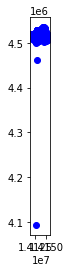

In [43]:
gdf_library2 = gdf_library.to_crs(epsg=3857)  #좌표계를 3857로 변환
gdf_library2.plot(color='blue')

In [63]:
#좌표 범위를 벗어나는 데이터를 제외하기 위해 행정구역 공간데이터 로딩
# dbf, prh, shp, shx 파일이 같은 경로에 있어야 함
gdf_admin_gu_pg = gpd.read_file('../dataset/SIG.shp', encoding='euc-kr')  
#euc-kr, euckr, utf-8, cp949 중 선택
gdf_admin_gu_pg.crs

<Projected CRS: PROJCS["PCS_ITRF2000_TM",GEOGCS["ITRF2000",DATUM[" ...>
Name: PCS_ITRF2000_TM
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: International Terrestrial Reference Frame 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [61]:
gdf_admin_gu_pg.crs = "epsg:5179"
gdf_admin_gu_pg.crs

<Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [62]:
gdf_admin_gu_pg

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."
...,...,...,...,...
245,48870,Hamyang-gun,함양군,"POLYGON ((1017715.723 1751280.191, 1017761.619..."
246,48880,Geochang-gun,거창군,"POLYGON ((1034571.593 1767759.812, 1034559.208..."
247,48890,Hapcheon-gun,합천군,"POLYGON ((1054066.576 1759517.415, 1054101.450..."
248,50110,Jeju-si,제주시,"MULTIPOLYGON (((874410.953 1480515.382, 874408..."


In [66]:
gdf_admin_gu_pg2 = gdf_admin_gu_pg.to_crs(epsg=3857)  #좌표계를 3857로 변환

In [67]:
gdf_admin_gu_pg2['SIG_CD'] = gdf_admin_gu_pg2['SIG_CD'].astype(str)

In [69]:
type(gdf_admin_gu_pg2)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

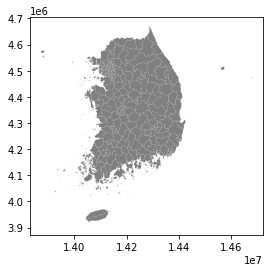

In [73]:
gdf_admin_gu_pg2.plot(color='grey')

In [74]:
#서울지역 행정구역만 추출
gdf_admin_gu_pg2['DO'] = gdf_admin_gu_pg2['SIG_CD'].str.slice(start=0, stop=2) 
gdf_admin_gu_pg3 = gdf_admin_gu_pg2[gdf_admin_gu_pg2['DO'].str.contains('11')==True]  
gdf_admin_gu_pg3.info()
gdf_admin_gu_pg3.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SIG_CD      25 non-null     object  
 1   SIG_ENG_NM  25 non-null     object  
 2   SIG_KOR_NM  25 non-null     object  
 3   geometry    25 non-null     geometry
 4   DO          25 non-null     object  
dtypes: geometry(1), object(4)
memory usage: 1.2+ KB


,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,DO
0,11110,Jongno-gu,종로구,"POLYGON ((14138537.494 4520328.400, 14138545.2...",11
1,11140,Jung-gu,중구,"POLYGON ((14140150.910 4519133.456, 14140175.5...",11
2,11170,Yongsan-gu,용산구,"POLYGON ((14134144.847 4516844.609, 14134143.5...",11
3,11200,Seongdong-gu,성동구,"POLYGON ((14142408.062 4519186.313, 14142611.9...",11
4,11215,Gwangjin-gu,광진구,"POLYGON ((14148892.587 4519195.233, 14148956.4...",11


<AxesSubplot:>

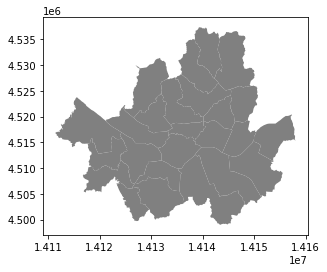

In [76]:
gdf_admin_gu_pg3.plot(color='grey')

<AxesSubplot:>

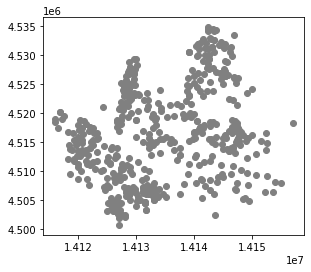

In [77]:
#서울시 안에 있는 도서관만 공간 선택
gdf_admin_gu_pg3['dummy'] = 'dummy'  #서울시 구별 폴리곤에 더미 컬럼 추가
geom = gdf_admin_gu_pg3.dissolve(by='dummy').geometry[0]  # '더미'값으로 디졸브한 서울시 영역
gdf_library3 = gdf_library2[gdf_library2.within(geom)] #서울시 영역 내 도서관 포인트 선택
gdf_library3.plot(color='grey')

In [78]:
#강남구 도서관만 한번 더 추출
gdf_library4 = gdf_library3[gdf_library3['gu'].str.contains('강남구')==True] 

<AxesSubplot:>

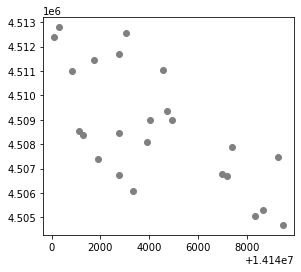

In [79]:
gdf_library4.plot(color='grey')

In [80]:
#도서관 공간데이터를 geojson으로 저장
gdf_library3.to_file('../dataset/library.geojson', driver='GeoJSON')
gdf_library4.to_file('../dataset/library_gn.geojson', driver='GeoJSON')

In [83]:
# 보안등 csv 로딩
df_slight = pd.read_csv('../dataset/전국보안등정보표준데이터.csv', index_col=None, header=0, 
                 names=['slight_id', 'cnt', 'addr1', 'addr2', 'lat', 'lon', 'inst_year', 'inst_ty', 'tel', 'admin', 'up_date', 'offer_cd', 'offer'], 
                 usecols=['slight_id', 'lat', 'lon', 'inst_year', 'offer'], 
                 dtype={'slight_id':object, 'lat':float, 'lon':float, 'inst_year':object, 'offer':object, },
                 encoding="EUC-KR")
df_slight.head()

,slight_id,lat,lon,inst_year,offer
0,"(태평동,태평동3630)",37.442347,127.133481,NaN,경기도 성남시
1,"(태평동,태평동3776)",37.445310,127.134487,NaN,경기도 성남시
2,"(태평동,태평동3774-1)",37.445112,127.134614,NaN,경기도 성남시
3,"(태평동,태평동3773-2)",37.444914,127.134559,NaN,경기도 성남시
4,"(태평동,태평동7184-3)",37.441478,127.125637,NaN,경기도 성남시


In [84]:
len(df_slight)

50000

In [94]:
# 보안등 CSV 에서 서울시 데이터만 추출
df_slight[['lat', 'lon']].dropna() #좌표값 없는 데이터 제거
df_slight2 = df_slight[df_slight['offer'].str.contains('서울특별시 강남구')==True]  #서울인 것만 추출

In [95]:
# 강남구 보안등 공간데이터화
geom_slight = gpd.points_from_xy(df_slight2.lon, df_slight2.lat)
coulumns = ['slight_id', 'inst_year']
gdf_slight = gpd.GeoDataFrame(df_slight2[coulumns], geometry=geom_slight, crs=from_epsg(4326))
gdf_slight.plot(color='grey')

<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 432x288 with 1 Axes>

In [96]:
gdf_slight2 = gdf_slight.to_crs(epsg=3857)  #좌표계를 3857로 변환
# 강남구 보안등 공간데이터를 geojson으로 저장
gdf_slight2.to_file('./data/python/slight.geojson', driver='GeoJSON')

ValueError: Cannot write empty DataFrame to file.

In [97]:
#학령인구 로딩
df_spop = pd.read_excel('./data/org/sl_teen_pop2018.xls', sheet_name = 'Sheet1', 
                        index_col=None, header=2, 
                        names=['year', 'gu', 'sum', 'year9_cnt', 'year9_ratio', 'year0_cnt', 'year0_ratio', 'spop_cnt', 'spop_ratio' ], 
                 dtype={'gu':object, 'spop_ratio':float},
                 encoding="utf-8"    )
df_spop.head()

TypeError: read_excel() got an unexpected keyword argument 'encoding'